# Chapter 3 Applied Labs


## Q14 (dealing with collinearity)

In [1]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.anova
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set(style="whitegrid")


In [2]:
boston = sm.datasets.get_rdataset("Boston", "MASS").data
boston = sm.add_constant(boston)

/home/will/.local/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [3]:
rs = []
for predictor in boston.columns.drop(["crim", "const"]):
    print(predictor)
    model = smf.ols(f"crim ~ {predictor}", data=boston)
    results = model.fit()
    rs.append([predictor, results.rsquared])
    print(results.summary())
    

zn
                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     21.10
Date:                Fri, 17 May 2019   Prob (F-statistic):           5.51e-06
Time:                        17:29:44   Log-Likelihood:                -1796.0
No. Observations:                 506   AIC:                             3596.
Df Residuals:                     504   BIC:                             3604.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.4537      0.417     10.675      

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     259.2
Date:                Fri, 17 May 2019   Prob (F-statistic):           2.36e-47
Time:                        17:29:44   Log-Likelihood:                -1701.4
No. Observations:                 506   AIC:                             3407.
Df Residuals:                     504   BIC:                             3415.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.5284      0.816    -10.454      0.0

In [4]:
print(rs)

[['zn', 0.04018790803211081], ['indus', 0.16531007043075163], ['chas', 0.0031238689633055206], ['nox', 0.17721718179269363], ['rm', 0.048069116716083604], ['age', 0.12442145175894637], ['dis', 0.14414937492539848], ['rad', 0.39125668674998926], ['tax', 0.3396142433788121], ['ptratio', 0.08406843894373672], ['black', 0.1482742394241312], ['lstat', 0.20759093253433558], ['medv', 0.15078046904975717]]


All bar `chas` seem to be significant. The highest R-values come from `rad`, `tax`, and `lstat`

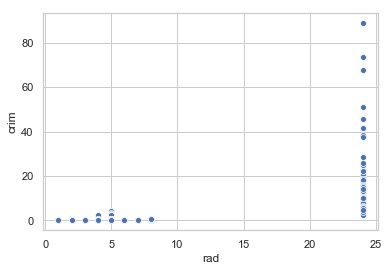

In [5]:
 sns.scatterplot("rad", "crim", data=boston) 

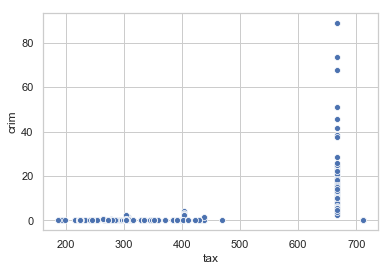

In [6]:
 sns.scatterplot("tax", "crim", data=boston) 

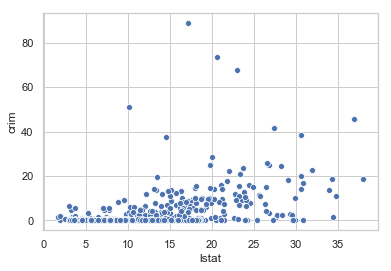

In [7]:
 sns.scatterplot("lstat", "crim", data=boston) 

### (b) Fit a multiple regression model using all the predictors. For which predictors can you reject the hypothesis $\beta_j=0$ ?

In [8]:
predictors = boston.columns.drop(["crim", "const"])
model = smf.ols(f"crim ~ {'+'.join(predictors)}" , data=boston)
results = model.fit()
print(results.summary())    

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     31.47
Date:                Fri, 17 May 2019   Prob (F-statistic):           1.57e-56
Time:                        17:29:45   Log-Likelihood:                -1653.3
No. Observations:                 506   AIC:                             3335.
Df Residuals:                     492   BIC:                             3394.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.0332      7.235      2.354      0.0

Only for `dis`, `rad`, and `medv` can we reject the null hypothesis at a p=0.01 level

### (c) plot the multi-regression coefficients against the single-regression coefficients to show how they compare.

In [9]:
single_betas = [] 
for predictor in boston.columns.drop(["crim", "const"]):
    model = smf.ols(f"crim ~ {predictor}", data=boston)
    results = model.fit()
    single_betas.append(results.params[1])
    

In [10]:
predictors = boston.columns.drop(["crim", "const"])
model = smf.ols(f"crim ~ {'+'.join(predictors)}" , data=boston)
results = model.fit()
multi_betas = results.params[1:]

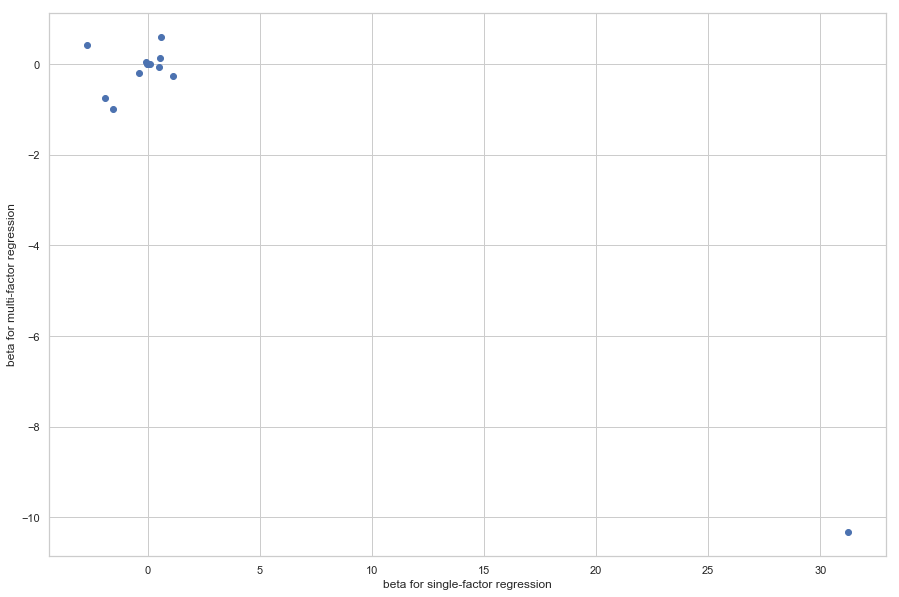

In [11]:
fig, ax = plt.subplots(figsize=(15,10))
plt.plot(single_betas, multi_betas, 'o')
plt.xlabel("beta for single-factor regression")
plt.ylabel("beta for multi-factor regression")
plt.show()

### (d) Is there evidence of non-linear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form $Y = \beta_0 + \beta_1x + \beta_2 x^2 + \beta_3 x^3 + \epsilon $ for each predictor

In [12]:
single_betas = [] 
for predictor in boston.columns.drop(["crim", "const"]):
    print(predictor)
    simple_model = smf.ols(f"crim ~ {predictor}", data=boston)
    simple_results = simple_model.fit()
    poly_model = smf.ols(f"crim ~ {predictor} + np.square({predictor}) + np.power({predictor}, 3)", data=boston)
    poly_results = poly_model.fit()
    # Get the ANOVA
    print(statsmodels.stats.anova.anova_lm(simple_results, poly_results))
    print("-"*80)

zn
   df_resid           ssr  df_diff     ss_diff         F    Pr(>F)
0     504.0  35861.672261      0.0         NaN       NaN       NaN
1     502.0  35187.114178      2.0  674.558083  4.811821  0.008512
--------------------------------------------------------------------------------
indus
   df_resid           ssr  df_diff      ss_diff         F        Pr(>F)
0     504.0  31186.705132      0.0          NaN       NaN           NaN
1     502.0  27661.567803      2.0  3525.137328  31.98696  8.408754e-14
--------------------------------------------------------------------------------
chas
   df_resid           ssr  df_diff  ss_diff   F  Pr(>F)
0     504.0  37246.504181      0.0      NaN NaN     NaN
1     504.0  37246.504181     -0.0     -0.0 NaN     NaN
--------------------------------------------------------------------------------
nox
   df_resid           ssr  df_diff      ss_diff          F        Pr(>F)
0     504.0  30741.817087      0.0          NaN        NaN           NaN
1     50

/home/will/.local/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/will/.local/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/will/.local/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


   df_resid           ssr  df_diff      ss_diff          F        Pr(>F)
0     504.0  31977.336895      0.0          NaN        NaN           NaN
1     502.0  26982.793319      2.0  4994.543576  46.460365  3.071837e-19
--------------------------------------------------------------------------------
rad
   df_resid           ssr  df_diff     ss_diff        F    Pr(>F)
0     504.0  22744.611548      0.0         NaN      NaN       NaN
1     502.0  22416.555537      2.0  328.056012  3.67327  0.026078
--------------------------------------------------------------------------------
tax
   df_resid           ssr  df_diff      ss_diff          F    Pr(>F)
0     504.0  24674.139624      0.0          NaN        NaN       NaN
1     502.0  23580.598960      2.0  1093.540664  11.640023  0.000011
--------------------------------------------------------------------------------
ptratio
   df_resid           ssr  df_diff     ss_diff        F    Pr(>F)
0     504.0  34222.154244      0.0         NaN     

For `chas`, `rad`, `black`,  and `lstat` there is insufficient evidence of non-linear association. For all other predictors, including terms up to X^3 improves the fit.